In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка и первичный осмотр данных

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Интеллектуальные системы и технологии/Automobile.csv')

1.1 Разбиение name на brand и model

In [ ]:
# Разбиваем столбец name на brand и model
df['brand'] = df['name'].str.split().str[0]
df['model'] = df['name'].str.split().str[1:].str.join(' ')

# Перемещаем brand и model сразу после name
cols = df.columns.tolist()

# Удаляем brand и model из списка (если они уже есть в конце)
cols.remove('brand')
cols.remove('model')

# Находим индекс столбца name
name_index = cols.index('name')

# Вставляем brand и model после name
cols = cols[:name_index+1] + ['brand', 'model'] + cols[name_index+1:]

# Применяем новый порядок
df = df[cols]

# Проверяем результат
df.head(10)

,name,brand,model,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,chevrolet,chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,buick,skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,plymouth,satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,amc,rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,ford,torino,17.0,8,302.0,140.0,3449,10.5,70,usa
5,ford galaxie 500,ford,galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,usa
6,chevrolet impala,chevrolet,impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,plymouth,fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,pontiac,catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
9,amc ambassador dpl,amc,ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,usa


1.2 Испрвление датасета

In [ ]:
df_clean = df.copy()
df_clean = df_clean[(df_clean['model'] != '') & (df_clean['brand'] != 'hi')]
brand_corrections = {
    'chevroelt': 'chevrolet',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'maxda': 'mazda',
    'vw': 'volkswagen'
}

df_clean['brand'] = df_clean['brand'].replace(brand_corrections)
df_clean.loc[df_clean['brand'] == 'capri', 'brand'] = 'mercury'

model_corrections = {
    '210 mpg': '210',
    'toyouta corona mark ii (sw)': 'corona mark ii (sw)',
    'chevroelt chevelle malibu': 'chevelle malibu',
    'vw rabbit': 'rabbit',
    'vw rabbit custom': 'rabbit custom',
    'vw dasher (diesel)': 'dasher (diesel)',
    'benz 300d': '300d',
    'capri 2000': 'capri 2000',
    'chevy c10': 'c10',
    'chevy s-10': 's-10',
    'datsun b-210': 'b210',
    'datsun 210 mpg': '210'
}

df_clean['model'] = df_clean['model'].replace(model_corrections)

df = df_clean


> В датасете было изменено следующее:
* Удалены строки с пустыми значениями в столбце model и с брендом hi;

* Исправлены опечатки в названиях брендов;

* Исправлены ошибки и стандартизированы названия моделей

1.3 Размер датасета


In [ ]:
print(df.shape)

(395, 11)


> Датасет имеет 398 строк и 11 столбцов

1.4 Типы данных

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 395 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          395 non-null    object 
 1   brand         395 non-null    object 
 2   model         395 non-null    object 
 3   mpg           395 non-null    float64
 4   cylinders     395 non-null    int64  
 5   displacement  395 non-null    float64
 6   horsepower    389 non-null    float64
 7   weight        395 non-null    int64  
 8   acceleration  395 non-null    float64
 9   model_year    395 non-null    int64  
 10  origin        395 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 37.0+ KB
None


> Датасет состоит из признаков:
*   числовых вещественных (float64): `mpg`, `displacement`, `horsepower`, `acceleration`;
*   числовых целых (int64): `cylinders`, `weight`, `model_year`;
*   категориальных: `name`(полное название машины), `brand` (бренд авто), `model` (модель авто) и `origin`(страна производитель).



> Описание признаков
* name - название модели автомобиля;
* brand - название бренда автомобиля;
* model - название модели автомобиля;
* mpg - расход топлива в милях на галлон;
* cylinders - число цилиндров двигателя;
* displacement - объём двигателя (куб. дюймы);
* horsepower - мощность двигателя (л. с.);
* weight - вес автомобиля (фунты);
* acceleration - время разгона (секунды);
* model_year - год выпуска модели (указан двумя цифрами);
* origin - регион производства (usa, europe, japan).

1.5 Первые и последние строки

In [ ]:
print("\n- - - - - - - - - - Первые строки - - - - - - - - - -")
print(df.head())
print("\n- - - - - - - - - - Последние строки - - - - - - - - - -")
print(df.tail())


- - - - - - - - - - Первые строки - - - - - - - - - -
                        name      brand            model   mpg  cylinders  \
0  chevrolet chevelle malibu  chevrolet  chevelle malibu  18.0          8   
1          buick skylark 320      buick      skylark 320  15.0          8   
2         plymouth satellite   plymouth        satellite  18.0          8   
3              amc rebel sst        amc        rebel sst  16.0          8   
4                ford torino       ford           torino  17.0          8   

   displacement  horsepower  weight  acceleration  model_year origin  
0         307.0       130.0    3504          12.0          70    usa  
1         350.0       165.0    3693          11.5          70    usa  
2         318.0       150.0    3436          11.0          70    usa  
3         304.0       150.0    3433          12.0          70    usa  
4         302.0       140.0    3449          10.5          70    usa  

- - - - - - - - - - Последние строки - - - - - - - - - 

1.6 Уникальные значения категориальных признаков

In [ ]:
for col in ['name']:
    print(f"Уникальные значения в {col}:")
    print(df[col].unique())
    print("Количество уникальных значений:", df[col].nunique())
    print("-----------------")


for col in ['brand', 'model', 'origin']:
    print(f"Уникальные значения в {col}:")
    print(df[col].unique())
    print("Количество уникальных значений:", df[col].nunique())
    print("-----------------")

Уникальные значения в name:
['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona har

> Признак `name` содержит 303 уникальных значений

> Признак `barnd` содержит 31 уникальных значений

> Признак `model` содержит 297 уникальных значений

> Признак `origin` содержит 3 уникальных значения: usa, japan и europe.

# 2. Анализ пропущенных значений

2.1 Подсчёт и визуализация пропусков

In [ ]:
print("Количество пропусков в каждом столбце")
print(df.isnull().sum())

Количество пропусков в каждом столбце
name            0
brand           0
model           0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


> В датасете, у числового вещественного признака `horsepower` имеется 6 пропущенных значений

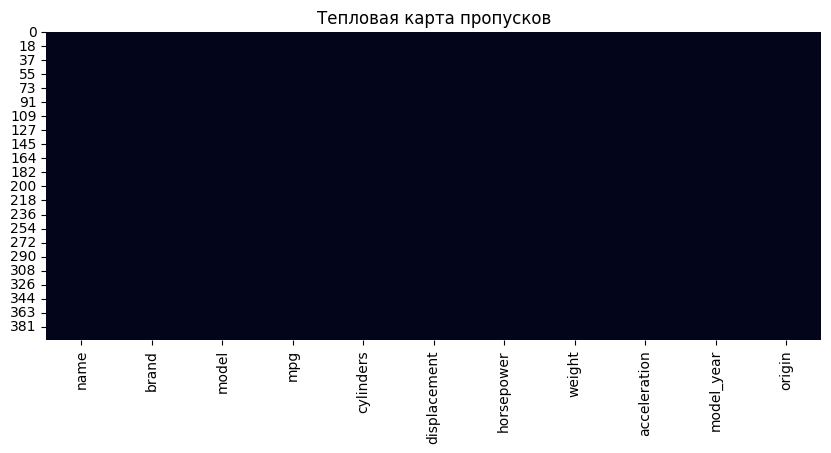

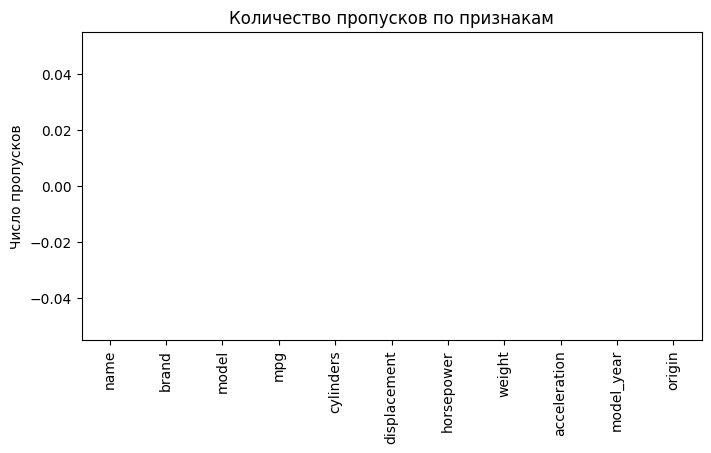

In [ ]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Тепловая карта пропусков")
plt.show()

df.isnull().sum().plot(kind='bar', figsize=(8, 4))
plt.title("Количество пропусков по признакам")
plt.ylabel("Число пропусков")
plt.show()

In [ ]:
missing_rows = df[df.isna().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [name, brand, model, mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin]
Index: []


> Пропуски встречаются у следующих моделей: Ford Pinto, Ford Maverick, Renault LeCar Deluxe, Ford Mustang Cobra, Renault 18i и AMC Concord DL.

2.2 Решение

In [ ]:
# Заполнение пропусков вручную
df.loc[32, 'horsepower'] = 75    # ford pinto (1971)
df.loc[126, 'horsepower'] = 72   # ford maverick (1974)
df.loc[330, 'horsepower'] = 50   # renault lecar deluxe (1980)
df.loc[336, 'horsepower'] = 135  # ford mustang cobra (1980)
df.loc[354, 'horsepower'] = 73   # renault 18i (1981)
df.loc[374, 'horsepower'] = 82   # amc concord dl (1982)


# # Заполнение пропусков медианой
# median_hp = df['horsepower'].median()
# df['horsepower'].fillna(median_hp, inplace=True)

# # Заполнение пропусков средним значением
# mean_hp = df['horsepower'].mean()
# df['horsepower'].fillna(mean_hp, inplace=True)

# Проверка, что пропусков больше нет
print("Количество пропусков:", df['horsepower'].isnull().sum())

Количество пропусков: 0


> Поскольку, количество пропусков небольшое, было принято решение, вручную заполнить пропуски значениями, взятыми из открытых источников.

> Поскольку `horsepower` это числовой признак, необходимо было проверить возможные выбросы. Результаты анализа показали, что у признака `horsepower` 10 выбросов.

> Поэтому, было принято решение заполнить пропуски медианой, что позволяет сохранить все строки и не исказить распределение данных

Удаление строк: применяется, когда пропусков мало, признак не критичный или невозможно восстановить значение. *Например, если пропуски есть в name или origin, лучше удалить строки, так как логично их восстановить нельзя.*

Заполнение средним: подходит для числовых признаков без выбросов и с симметричным распределением (когда значения примерно одинаково распределены вокруг среднего).

Заполнение медианой: медиана — это среднее значение, которое делит данные пополам (50% меньше, 50% больше), сортируя их по возрастанию. Подходит для числовых признаков с выбросами, так как она устойчива к экстремальным значениям.

Заполнение модой: мода — это наиболее частое значение признака. Используется для категориальных признаков или дискретных числовых, например, cylinders или origin.

Оставить как отдельную категорию: применяется для категориальных признаков, когда пропуски могут сами нести информацию. *Например, пропуски в name можно обозначить как "unknown_model".*

# 3. Анализ распределений

3.1 Числовые признаки: гистограммы, boxplots, статистики (mean, std, min, max, quantiles)

In [ ]:
# Список числовых признаков
num_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

# Основные статистики
print(df[num_cols].describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  395.000000  395.000000    395.000000  395.000000   395.000000   
mean    23.522785    5.455696    193.606329  104.015190  2969.724051   
std      7.797975    1.699488    104.315852   38.273525   843.677749   
min     10.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.500000   75.000000  2224.500000   
50%     23.000000    4.000000    151.000000   92.000000  2807.000000   
75%     29.000000    8.000000    262.000000  125.000000  3607.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    395.000000  395.000000  
mean      15.555190   76.017722  
std        2.761904    3.689358  
min        8.000000   70.000000  
25%       13.800000   73.000000  
50%       15.500000   76.000000  
75%       17.050000   79.000000  
max       24.800000   82.000000  


* mean — среднее
* std — стандартное отклонение
* min / max — минимальное и максимальное
* 25% / 50% / 75% — квартильные значения

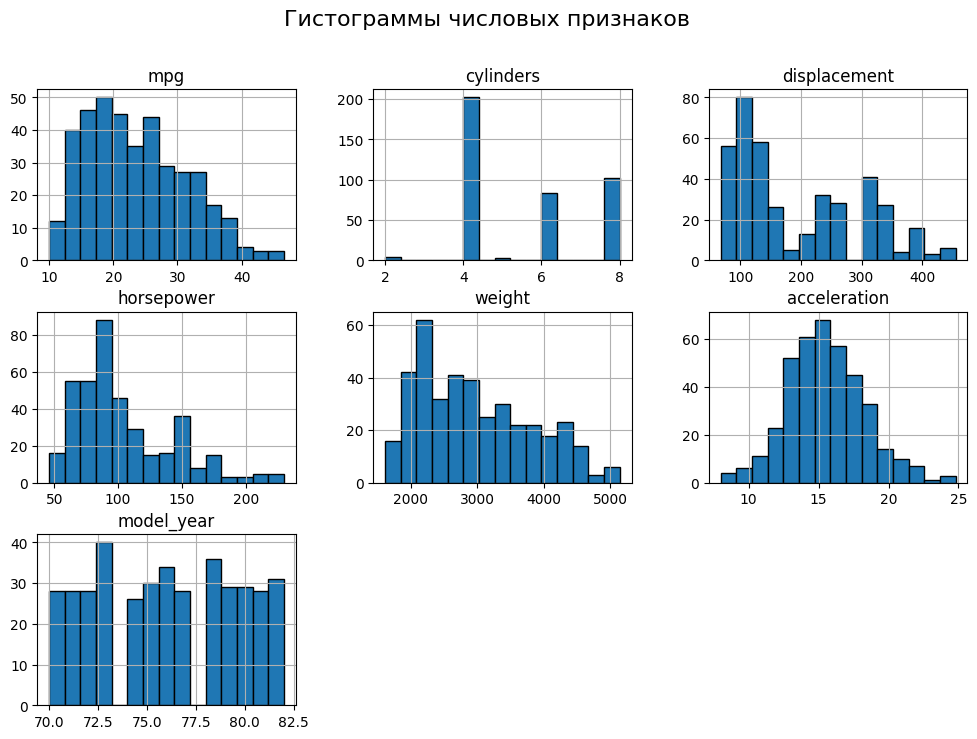

In [ ]:
df[num_cols].hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle("Гистограммы числовых признаков", fontsize=16)
plt.show()

На гистограме изображено: распределение значений каждого числового признака.
* По оси X - значения признака (например, расход топлива mpg);
* По оси Y - количество автомобилей с этим значением.

На boxplots изображено:
* Ящик (box) - от (25%) до (75%) межквартильный диапазон (IQR).
* Линия внутри ящика - медиана (50%).
* "Усы" - примерно 1.5 * IQR за пределами ящика.
* Точки за усами - выбросы (значения, сильно отличающиеся от остальных).

3.2 Проверка столбца cylinders

In [ ]:
df[(df  ['cylinders'] == 3) | (df['cylinders'] == 5)]

,id,name,brand,model,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
274,274,audi 5000,audi,5000,20.3,5,131.0,103.0,2830,15.9,78,europe
297,297,mercedes benz 300d,mercedes,300d,25.4,5,183.0,77.0,3530,20.1,79,europe
327,327,audi 5000s (diesel),audi,5000s (diesel),36.4,5,121.0,67.0,2950,19.9,80,europe


In [ ]:
# Список моделей, которым нужно присвоить 2 цилиндра
two_cyl_models = ['rx2 coupe', 'rx3', 'rx-4', 'rx-7 gs']

# Изменяем значение cylinders на 2 для этих моделей
df.loc[df['model'].isin(two_cyl_models), 'cylinders'] = 2

df[(df  ['cylinders'] == 2)]

,name,brand,model,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
71,mazda rx2 coupe,mazda,rx2 coupe,19.0,2,70.0,97.0,2330,13.5,72,japan
111,maxda rx3,mazda,rx3,18.0,2,70.0,90.0,2124,13.5,73,japan
243,mazda rx-4,mazda,rx-4,21.5,2,80.0,110.0,2720,13.5,77,japan
334,mazda rx-7 gs,mazda,rx-7 gs,23.7,2,70.0,100.0,2420,12.5,80,japan


> В датасете присутствовали автомобили с количеством цилиндров, равным 3. Все они относились к японским роторным моделям бренда Mazda (модели RX). После изучения технических характеристик из открытых источников стало ясно, что количество цилиндров у этих автомобилей должно быть 2. Соответственно, в строках с этими автомобилями значение столбца `cylinders` было изменено на 2.

3.2 Категориальные признаки (conutplots, частоты значений)

/tmp/ipython-input-349447735.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='origin', data=df, palette=palette_origin)


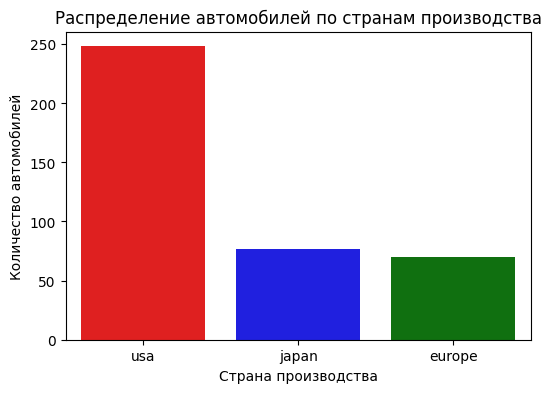

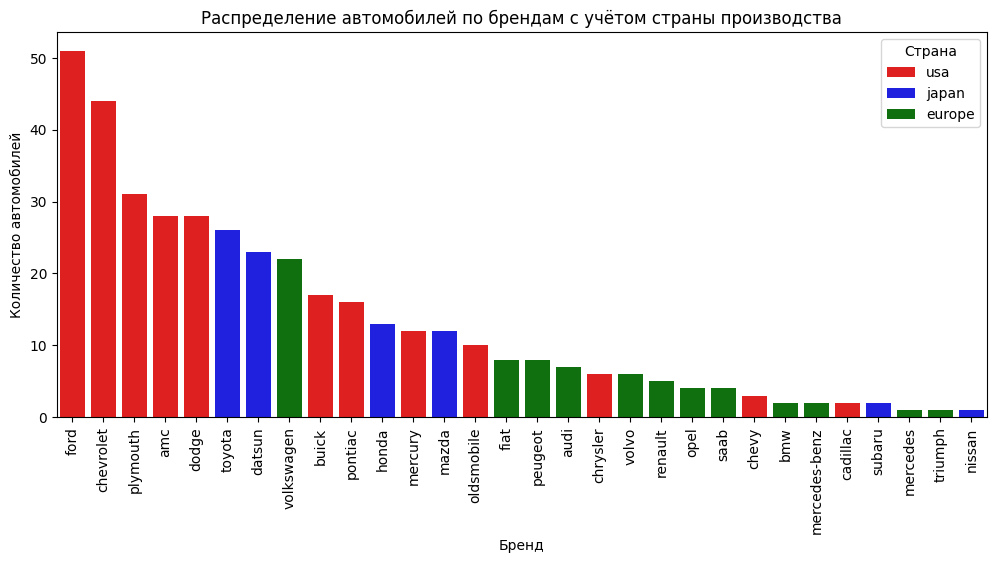

In [ ]:
cat_cols = ['name', 'origin', 'brand', 'model']
df['origin'] = df['origin'].str.lower()

palette_origin = {
    'usa': 'red',
    'japan': 'blue',
    'europe': 'green'
}

# Распределение origin
plt.figure(figsize=(6,4))
sns.countplot(x='origin', data=df, palette=palette_origin)
plt.title("Распределение автомобилей по странам производства")
plt.xlabel("Страна производства")
plt.ylabel("Количество автомобилей")
plt.show()

# Распределение brand
plt.figure(figsize=(12,5))
sns.countplot(
    x='brand',
    data=df,
    order=df['brand'].value_counts().index,
    hue='origin',
    palette=palette_origin
)
plt.title("Распределение автомобилей по брендам с учётом страны производства")
plt.xlabel("Бренд")
plt.xticks(rotation=90)
plt.ylabel("Количество автомобилей")
plt.legend(title="Страна")
plt.show()


* Большинство автомобилей в датасете произведены в США (248), далее идут Япония (77) и Европа (70).

* По брендам лидируют Ford и Chevrolet, дальше идут Plymouth, Dodge и AMC.

* Если учитывать страну производства, все американские бренды (Ford, Chevrolet, Plymouth, Dodge, AMC и др.) производились в США, японские бренды (Toyota, Datsun, Mazda, Honda, Subaru, Nissan) — в Японии, а европейские (Volkswagen, Peugeot, Audi, Fiat, BMW и др.) — в Европе.

In [ ]:
print("Количество автомобилей по странам производства:")
print(df['origin'].value_counts().sort_index())

print("\nСтраны производители, их бренды и количество автомобилей:")
brand_origin_counts = df.groupby(['brand', 'origin']).size().reset_index(name='count')
brand_origin_counts = brand_origin_counts.sort_values(by=['origin', 'count'], ascending=[True, False])
print(brand_origin_counts)

Количество автомобилей по странам производства:
origin
europe     70
japan      77
usa       248
Name: count, dtype: int64

Страны производители, их бренды и количество автомобилей:
            brand  origin  count
28     volkswagen  europe     22
10           fiat  europe      8
20        peugeot  europe      8
1            audi  europe      7
29          volvo  europe      6
23        renault  europe      5
19           opel  europe      4
24           saab  europe      4
2             bmw  europe      2
15  mercedes-benz  europe      2
14       mercedes  europe      1
27        triumph  europe      1
26         toyota   japan     26
8          datsun   japan     23
12          honda   japan     13
13          mazda   japan     12
25         subaru   japan      2
17         nissan   japan      1
11           ford     usa     51
5       chevrolet     usa     44
21       plymouth     usa     31
0             amc     usa     28
9           dodge     usa     28
3           buick     usa 

> Частотный анализ показывает:
1. По странам производства (origin):
* Большинство автомобилей произведено в США — 248 единиц, меньше всего — в Европе (70 единиц).

2. По брендам (brand):

* Всего 31 уникальный бренд;
* Наиболее часто встречаются американские бренды: Ford (51 автомобиль), Chevrolet (44), Plymouth (31), Dodge (28), AMC (28);
* Среди японских брендов чаще всего встречаются Toyota (26), Datsun (23), Honda (13), Mazda (12);
* Европейские бренды представлены меньшими количествами: Volkswagen (22), Peugeot (8), Fiat (8), Audi (7), BMW (2), Mercedes-Benz (2);
* Большинство брендов встречаются редко — по 1–3 автомобиля на бренд.

3. Бренды по странам производства:
* Все американские бренды производились в США.
* Японские бренды — в Японии.
* Европейские бренды — в Европе.

Данные подтверждают, что каждая страна производила характерный набор брендов, что соответствует историческим реалиям.

# 4. Выявление выбросов

4.1 Метод межквартального размаха (IQR)

In [ ]:
# Числовые признаки
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('id')))
df = df[cols]
num_cols = ['id', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR  # нижняя граница
    upper = Q3 + 1.5 * IQR  # верхняя граница

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: найдено {outliers.shape[0]} выбросов")

    if not outliers.empty:
        print(f"\nСтроки с выбросами по признаку '{col}':\n")
        print(outliers.to_string(index=False))
        print("\n" + "-"*80 + "\n")

id: найдено 0 выбросов
mpg: найдено 0 выбросов
cylinders: найдено 0 выбросов
displacement: найдено 0 выбросов
horsepower: найдено 10 выбросов

Строки с выбросами по признаку 'horsepower':

 id                         name     brand               model  mpg  cylinders  displacement  horsepower  weight  acceleration  model_year origin
  6             chevrolet impala chevrolet              impala 14.0          8         454.0       220.0    4354           9.0          70    usa
  7            plymouth fury iii  plymouth            fury iii 14.0          8         440.0       215.0    4312           8.5          70    usa
  8             pontiac catalina   pontiac            catalina 14.0          8         455.0       225.0    4425          10.0          70    usa
 13      buick estate wagon (sw)     buick   estate wagon (sw) 14.0          8         455.0       225.0    3086          10.0          70    usa
 25                    ford f250      ford                f250 10.0          8   

4.2 Визуализация

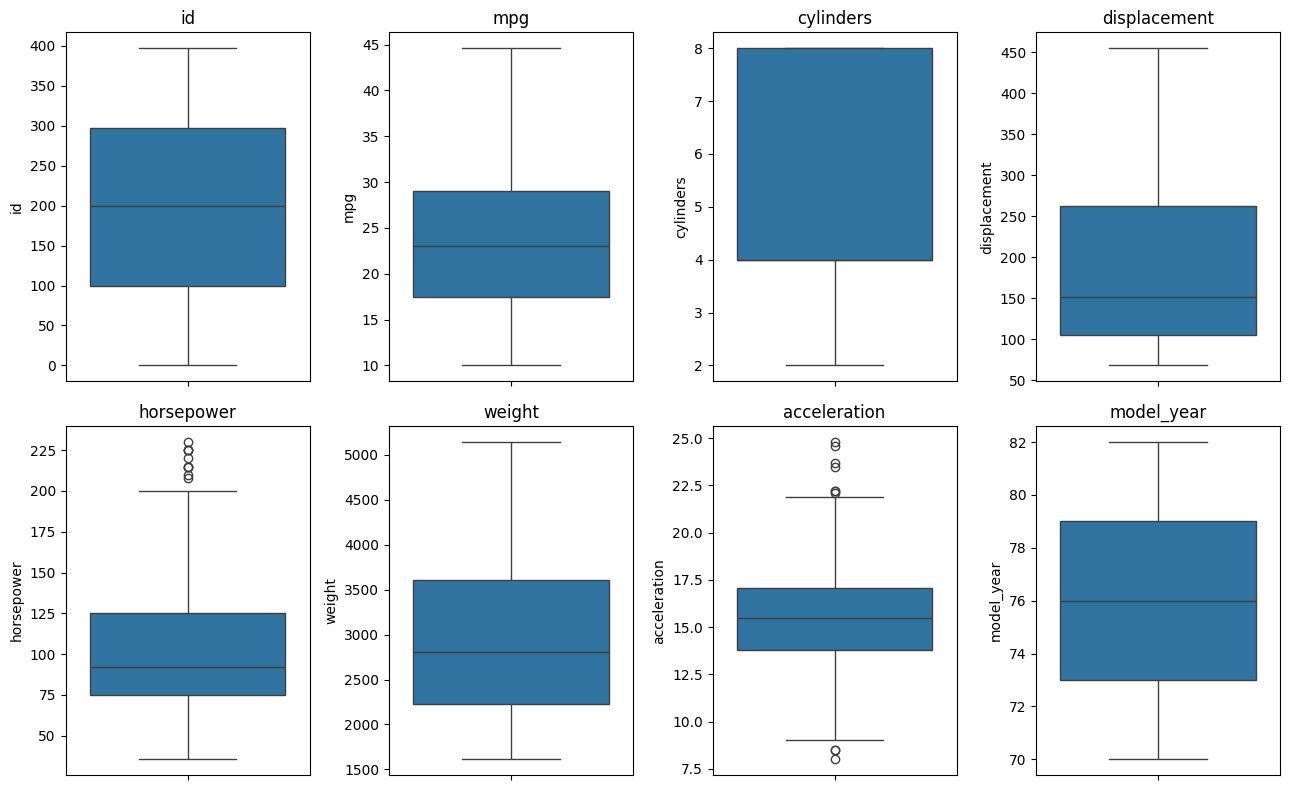

In [ ]:
plt.figure(figsize=(13, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"{col}")
    plt.ylabel(col)
plt.tight_layout()
plt.show()


> Выбросы, выявленные для признаков `horsepower` и `acceleration`, являются реальными и обоснованными значениями, а не ошибками данных.

> Для `horsepower` высокие значения встречаются у мощных американских машин (например, chevrolet impala, plymouth fury iii, pontiac catalina), что соответствует историческим характеристикам двигателей.

> Для `acceleration` как низкие, так и высокие значения отражают реальные особенности автомобилей: низкие ускорения у тяжёлых мощных машин, высокие ускорения у лёгких малолитражных машин и спортивных моделей (например, японские и европейские роторные/компактные автомобили).

> Следовательно, замена или удаление этих выбросов нецелесообразна, так как это исказит реальные характеристики автомобилей и ухудшит качество анализа.

4.3 Замена выбросов (не целесообразна)

In [ ]:
# Замена выброса в mpg для mazda glc
df.loc[322, 'horsepower'] = 35.51

In [ ]:
# num_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

# for col in num_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR

#     # Ограничиваем значения в пределах нижней и верхней границы
#     df[col] = df[col].clip(lower, upper)

# # Проверим количество выбросов после ограничения
# for col in num_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR

#     outliers = df[(df[col] < lower) | (df[col] > upper)]
#     print(f"{col}: найдено {outliers.shape[0]} выбросов")

Для каждого числового признака вычисляются границы выбросов по методу IQR (нижняя и верхняя границы). Все значения, которые выходят за эти границы, заменяются на сами границы с помощью clip

# 5. Анализ взаимосвязей

5.1 Корреляционная матрица

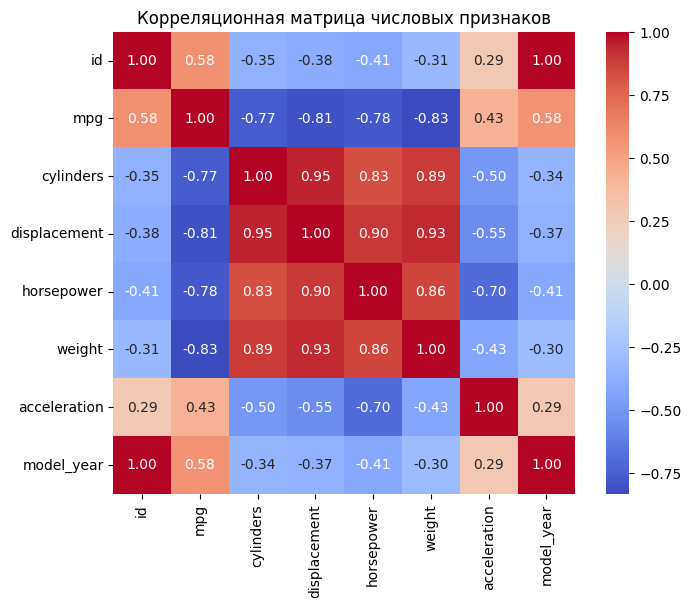

In [ ]:
corr_matrix = df[num_cols].corr()

# Визуализируем heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Корреляционная матрица числовых признаков")
plt.show()

Корреляционная матрица позволяет увидеть, какие числовые признаки сильно связаны между собой.
Значения корреляции от -1 до 1:
* 1 - сильная положительная связь,
* -1 - сильная отрицательная связь,
* 0 -отсутствие линейной связи.

5.2 Сравнения распределений по критериям

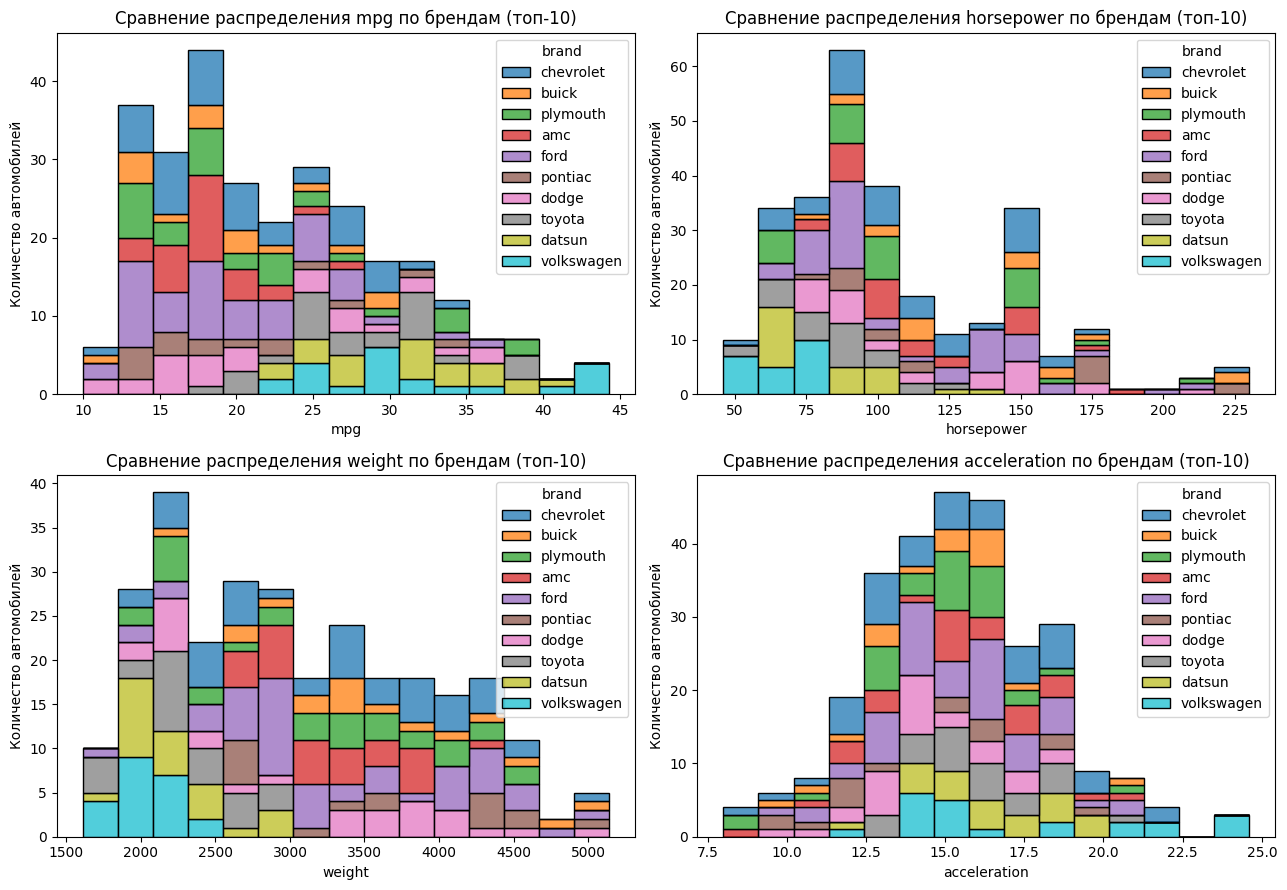

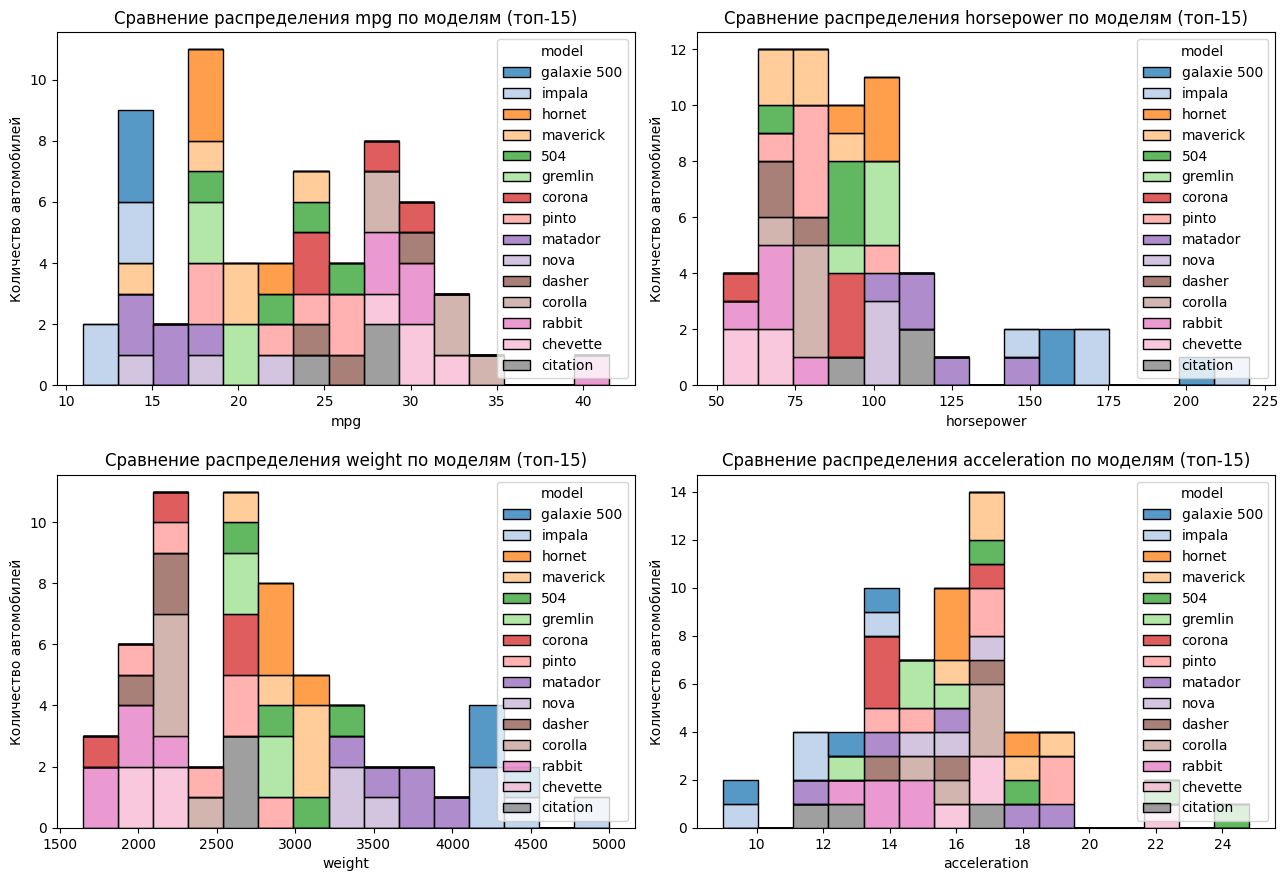

In [ ]:
num_cols_compare = ['mpg', 'horsepower', 'weight', 'acceleration']

# Сравнение по бренду (топ-10 по количеству)
top_brands = df['brand'].value_counts().index[:10]

plt.figure(figsize=(13, 9))
for i, col in enumerate(num_cols_compare):
    plt.subplot(2, 2, i+1)
    sns.histplot(
        data=df[df['brand'].isin(top_brands)],
        x=col,
        hue='brand',
        bins=15,
        palette='tab10',
        multiple='stack'
    )
    plt.title(f"Сравнение распределения {col} по брендам (топ-10)")
    plt.xlabel(col)
    plt.ylabel("Количество автомобилей")
plt.tight_layout()
plt.show()

# Сравнение по модели (топ-15 по количеству)
top_models = df['model'].value_counts().index[:15]

plt.figure(figsize=(13, 9))
for i, col in enumerate(num_cols_compare):
    plt.subplot(2, 2, i+1)
    sns.histplot(
        data=df[df['model'].isin(top_models)],
        x=col,
        hue='model',
        bins=15,
        palette='tab20',
        multiple='stack'
    )
    plt.title(f"Сравнение распределения {col} по моделям (топ-15)")
    plt.xlabel(col)
    plt.ylabel("Количество автомобилей")
plt.tight_layout()
plt.show()


# num_cols_compare = ['mpg', 'horsepower', 'weight', 'acceleration']
# plt.figure(figsize=(13, 9))

# for i, col in enumerate(num_cols_compare):
#     plt.subplot(2, 2, i+1)
#     sns.histplot(data=df, x=col, hue='origin', bins=15, palette='Set2', multiple='stack') # stack
#     plt.title(f"Сравнение распределения {col} по странам производства")
#     plt.xlabel(col)
#     plt.ylabel("Количество автомобилей")

# plt.tight_layout()
# plt.show()

5.3 Сводные таблицы

In [ ]:
mean_by_brand = df.groupby('brand')[['mpg', 'horsepower', 'weight', 'acceleration']].mean()
print("Средние значения числовых признаков по брендам:")
print(mean_by_brand.sort_values('mpg', ascending=False))

Средние значения числовых признаков по брендам:
                     mpg  horsepower       weight  acceleration
brand                                                          
nissan         36.000000   88.000000  2160.000000     14.500000
triumph        35.000000   88.000000  2500.000000     15.100000
honda          33.761538   67.846154  2023.384615     15.992308
renault        32.880000   66.600000  2074.200000     17.000000
subaru         31.900000   67.000000  2065.000000     17.200000
volkswagen     31.840909   64.136364  2045.818182     17.404545
datsun         31.113043   83.826087  2242.217391     16.408696
mazda          29.134167   75.209167  2235.083333     16.091667
fiat           28.912500   73.375000  2143.125000     15.650000
toyota         28.165385   83.961538  2309.038462     16.038462
audi           26.714286   86.714286  2556.142857     15.942857
opel           25.750000   81.000000  2200.250000     15.225000
mercedes       25.400000   77.000000  3530.000000     20

> Есть явная корреляция между экономичностью и мощностью/весом: легкие и маломощные автомобили обычно более экономичны.

> Европейские бренды (Honda, Nissan, Renault, Volkswagen) отличаются высокой экономичностью и небольшим весом.

> Американские бренды (Cadillac, Chrysler, Pontiac, Chevy) тяжелые, мощные и менее экономичные.

In [ ]:
# Средние значения числовых признаков по странам производства
mean_values = df.groupby('origin')[['mpg', 'horsepower', 'weight', 'acceleration']].mean()
print("Средние значения числовых признаков по странам производства:")
print(mean_values)

Средние значения числовых признаков по странам производства:
              mpg  horsepower       weight  acceleration
origin                                                  
europe  27.891429   80.014286  2423.300000     16.787143
japan   30.340390   79.448182  2221.051948     16.159740
usa     20.128226  118.298387  3356.407258     15.019758


* Японские автомобили наиболее экономичны (mpg =+- 30), лёгкие (weight =+- 2221) и с умеренной мощностью.
* Европейские автомобили также экономичные, но немного тяжелее и мощнее японских.
* Американские машины мощные (horsepower =+- 118) и тяжёлые (weight =+- 3362), но имеют высокий расход топлива (mpg =+- 20).

In [ ]:
# Максимальные и минимальные значения числовых признаков по странам
agg_values = df.groupby('origin')[['mpg', 'horsepower', 'weight', 'acceleration']].agg(['min', 'max'])
print("Минимальные и максимальные значения по странам производства:")
print(agg_values)

Минимальные и максимальные значения по странам производства:
         mpg       horsepower        weight       acceleration      
         min   max        min    max    min   max          min   max
origin                                                              
europe  16.2  44.3      46.00  133.0   1825  3820         12.2  24.8
japan   18.0  44.6      35.51  132.0   1613  2930         11.4  21.0
usa     10.0  39.0      52.00  230.0   1800  5140          8.0  22.2


* Европейские и японские машины имеют более узкий диапазон веса и мощности, американские — широкий.
* Американские 8-цилиндровые автомобили могут быть очень тяжёлыми и мощными (weight до 5140, horsepower до 202.5).
* Японские и европейские автомобили ограничены меньшими значениями, что соответствует компактному и экономичному типу машин.

In [ ]:
# Средние значения по числу цилиндров
mean_by_cylinders = df.groupby('cylinders')[['mpg', 'horsepower', 'weight', 'acceleration']].mean()
print("Средние значения числовых признаков по числу цилиндров:")
print(mean_by_cylinders)

Средние значения числовых признаков по числу цилиндров:
                 mpg  horsepower       weight  acceleration
cylinders                                                  
2          20.550000   99.250000  2398.500000     13.250000
4          29.233218   78.235198  2308.920792     16.600990
5          27.366667   82.333333  3103.333333     18.633333
6          19.985714  101.154762  3198.226190     16.263095
8          15.021569  157.960784  4108.666667     12.900980


Чем больше цилиндров, тем:
* Меньше экономичность (mpg падает с 29 до 15).
* Больше мощность и вес (horsepower и weight растут).
* Меньше ускорение (acceleration снижается).
* 4-цилиндровые машины — наиболее лёгкие и экономичные, 8-цилиндровые — самые тяжёлые и мощные.

In [ ]:
mean_by_year = df.groupby('model_year')[['mpg', 'horsepower', 'weight', 'acceleration']].mean()
print("Средние значения числовых признаков по годам моделей:")
print(mean_by_year)

Средние значения числовых признаков по годам моделей:
                  mpg  horsepower       weight  acceleration
model_year                                                  
70          18.000000  146.214286  3324.250000     12.750000
71          21.250000  105.892857  2995.428571     15.142857
72          18.714286  120.178571  3237.714286     15.125000
73          17.100000  130.475000  3419.025000     14.312500
74          22.576923   93.423077  2896.653846     16.230769
75          20.266667  101.066667  3176.800000     16.050000
76          21.573529  101.117647  3078.735294     15.941176
77          23.375000  105.071429  2997.357143     15.435714
78          24.061111   99.694444  2861.805556     15.805556
79          25.093103  101.206897  3055.344828     15.813793
80          33.314138   77.500345  2436.655172     16.934483
81          30.264286   81.250000  2539.285714     16.253571
82          31.709677   81.483871  2453.548387     16.638710


> С 70-х годов произошли значительные изменения: снижение мощности и веса привело к повышению экономичности.

> Автомобили 1980–1982 годов были легче, экономичнее и с более умеренной мощностью, что соответствует глобальным тенденциям повышения топливной эффективности в тот период.

# 6. Формулировка гипотез

> На основе анализа датасета были сформулированы следующие гипотезы:
* Автомобили с большим количеством цилиндров имеют большой расход топлива, при меньшем `mpg`;
* Автомобили с более большим объемом двигателя `displacement` имеют более высокую мощность `horsepower`;
* Более поздние модели автомобилей имеют лучшее соотношение расхода `mpg` к мощности.


# 7. Выводы и рекомандации

На основе корреляций, визуализаций и сводных таблиц можно выделить следующие информативные признаки:
* horsepower, displacement, weight - сильно связаны с расходом топлива (mpg);
* model_year - оказывает заметное влияние на mpg благодаря технологическому прогрессу;
* origin - объясняет различия в конструкции и эффективности автомобилей разных регионов.

> Качественные данные:
* Пропуски были заменены на реальные значения, соответствующие известной информации о моделях автомобилей.
* Выбросы в числовых признаках, таких как `horsepower` и `acceleration`, не являются ошибками - это реальные значения для мощных моделей автомобилей. Они отражают особенности отдельных моделей и не требуют удаления или корректировки.

> Четко прослеживаются закономерности:
* Американские автомобили - тяжелые и мощные, имеют самый низкий mpg.
* Европейские и японские автомобили - легче, экономичнее и имеют меньшую мощность.
* Количество цилиндров напрямую связано с расходом топлива: больше цилиндров - ниже mpg.
* Год выпуска `model_year` сильно влияет на экономичность: более новые машины заметно эффективнее.